In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [27]:
cifar=tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test)=cifar.load_data()


In [4]:
print(tf.shape(x_train))
print(tf.shape(x_test))
print(tf.shape(y_train))
print(tf.shape(y_test))

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

tf.Tensor([50000    32    32     3], shape=(4,), dtype=int32)
tf.Tensor([10000    32    32     3], shape=(4,), dtype=int32)
tf.Tensor([50000     1], shape=(2,), dtype=int32)
tf.Tensor([10000     1], shape=(2,), dtype=int32)


[]

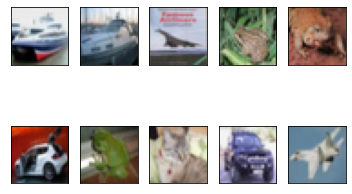

In [28]:

for i in range(1,11):
  ax=plt.subplot(2,5,i)
  plt.imshow(x_test[i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.plot()


In [6]:

x_test=tf.keras.utils.normalize(x_test)
x_train=tf.keras.utils.normalize(x_train)
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)
print(y_train[0])
print(y_test[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [10]:
input=(32,32,3)
def alexnet(input):
  model=tf.keras.Sequential()
  model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',input_shape=input))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))
  model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(64,activation='relu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(10,activation='softmax'))
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  return model


In [11]:
alexnet=alexnet(input)
alexnet.fit(x_train,y_train,epochs=50,batch_size=128)

Epoch 1/50
391/391 [==============================] - 5s 10ms/step - loss: 2.0330 - accuracy: 0.2452
Epoch 2/50
391/391 [==============================] - 4s 10ms/step - loss: 1.8006 - accuracy: 0.3418
Epoch 3/50
391/391 [==============================] - 4s 10ms/step - loss: 1.7233 - accuracy: 0.3750
Epoch 4/50
391/391 [==============================] - 4s 10ms/step - loss: 1.6740 - accuracy: 0.3969
Epoch 5/50
391/391 [==============================] - 4s 10ms/step - loss: 1.6308 - accuracy: 0.4101
Epoch 6/50
391/391 [==============================] - 4s 10ms/step - loss: 1.6032 - accuracy: 0.4220
Epoch 7/50
391/391 [==============================] - 4s 10ms/step - loss: 1.5860 - accuracy: 0.4320
Epoch 8/50
391/391 [==============================] - 4s 10ms/step - loss: 1.5613 - accuracy: 0.4395
Epoch 9/50
391/391 [==============================] - 4s 10ms/step - loss: 1.5420 - accuracy: 0.4480
Epoch 10/50
391/391 [==============================] - 4s 10ms/step - loss: 1.5220 - accura

In [12]:
alexnet.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.3162 - accuracy: 0.5833


[1.3162142038345337, 0.583299994468689]

In [13]:
a=alexnet.predict(x_test)

[]

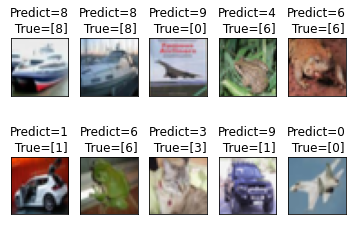

In [40]:

for i in range(1,11):
    axes=plt.subplot(2,5,i)
    plt.imshow(x_test[i])
    axes.set_title('Predict={}\n True={}'.format(a[i].argmax(),y_test[i]))
    axes.get_xaxis().set_visible(False)
    axes.get_yaxis().set_visible(False)
    


plt.plot()
